In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import folium
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

pd.maxdisplaycolums = None

In [2]:
data = pd.read_csv('EPL_20_21.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Age                    532 non-null    int64  
 4   Matches                532 non-null    int64  
 5   Starts                 532 non-null    int64  
 6   Mins                   532 non-null    int64  
 7   Goals                  532 non-null    int64  
 8   Assists                532 non-null    int64  
 9   Passes_Attempted       532 non-null    int64  
 10  Perc_Passes_Completed  532 non-null    float64
 11  Penalty_Goals          532 non-null    int64  
 12  Penalty_Attempted      532 non-null    int64  
 13  xG                     532 non-null    float64
 14  xA                     532 non-null    float64
 15  Yellow

In [4]:
data.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [5]:
data.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [6]:
data['Mins/Match'] = (data['Mins']) / (data['Matches'])
data['Mins/Match']  = data['Mins/Match'].astype(int)

In [7]:
data['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [8]:
position = pd.DataFrame(data.Position.str.split(',',1).tolist(),
                                 columns = ['Position','Secondary_Pos'])

In [9]:
data = data.drop(columns='Position')
position = position.drop(columns='Secondary_Pos')

In [10]:
data = pd.concat([data,position],axis =1)

In [11]:
data.isna().sum()

Name                     0
Club                     0
Nationality              0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
Mins/Match               0
Position                 0
dtype: int64

In [12]:
df_GK = data.where(data['Position']=='GK')
df_GK = df_GK.dropna()
df_DF = data.where(data['Position']=='DF')
df_DF = df_DF.dropna()
df_MF = data.where(data['Position']=='MF')
df_MF = df_MF.dropna()
df_FW = data.where(data['Position']=='FW')
df_FW = df_FW.dropna()

In [13]:
print("Number of Goalkeepers in the league : ",len(df_GK))
print("Number of Defenders in the league : ",len(df_DF))
print("Number of Midfielders in the league : ",len(df_MF))
print("Number of Forwards in the league : ",len(df_FW))

Number of Goalkeepers in the league :  42
Number of Defenders in the league :  199
Number of Midfielders in the league :  157
Number of Forwards in the league :  134


Text(0.5, 1.0, 'Plot of Goals per position')

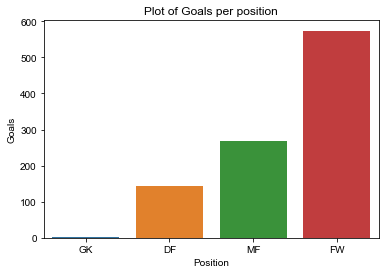

In [14]:
goal_team = pd.DataFrame(data.groupby('Position', as_index=False)['Goals'].sum() )
ax =sns.barplot(x='Position', y='Goals', data=goal_team.sort_values(by="Goals"))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=0)
plt.title('Plot of Goals per position')

Text(0, 0.5, 'Number of players')

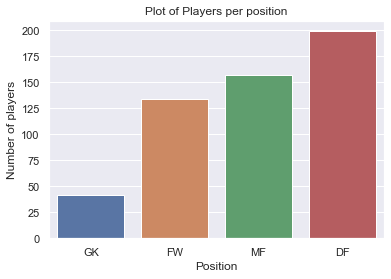

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Position",data=data, order = data['Position'].value_counts(ascending = True).index)
plt.xticks(rotation=0)
plt.title('Plot of Players per position')
plt.ylabel('Number of players')

Text(0.5, 1.0, 'Plot of Clubs vs Total goals scored')

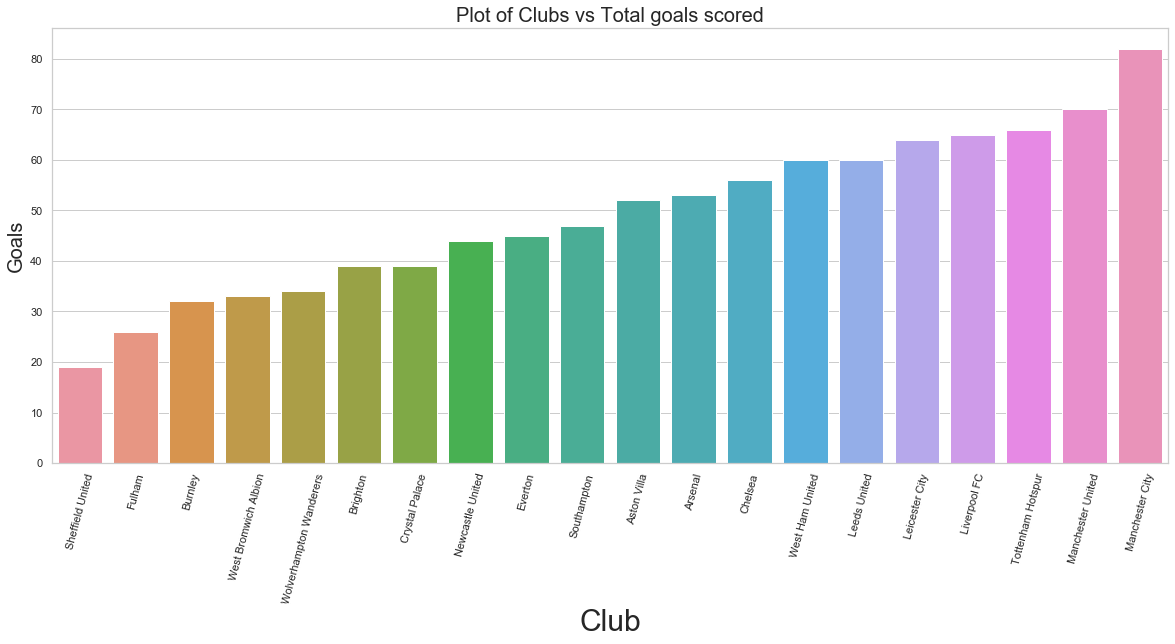

In [35]:
goals = pd.DataFrame(data.groupby('Club', as_index=False)['Goals'].sum() )
sns.set_theme(style="whitegrid",color_codes=True)
ax = sns.barplot(x='Club',y='Goals',data=goals.sort_values(by="Goals"))
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Goals",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total goals scored',fontsize = 20)

In [17]:
# Net goals for every player
data['net_goals'] = data['Goals'] - data['Penalty_Goals']

Text(0.5, 1.0, 'Plot of Clubs vs Non penalty goals scored')

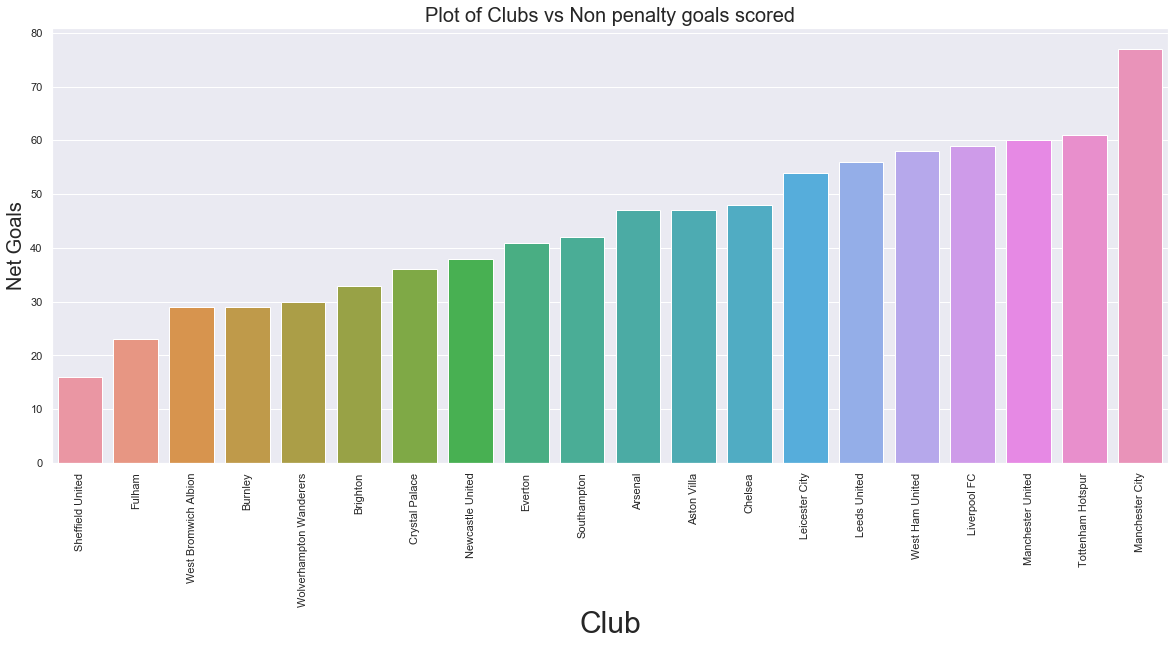

In [18]:
#Plotting Net goals per club
goals = pd.DataFrame(data.groupby('Club', as_index=False)['net_goals'].sum() )
sns.set_theme(style="darkgrid",color_codes=True)
ax = sns.barplot(x='Club',y='net_goals',data=goals.sort_values(by="net_goals"))
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Net Goals",fontsize=20)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Non penalty goals scored',fontsize = 20)

In [19]:
df_age1 = data.where(data.Age<=20)
df_age1 = df_age1.dropna()
df_age2 = data[(data['Age']>20) & (data['Age']<=30)]
df_age2 = df_age2.dropna()
df_age3 = data[(data['Age']>30) & (data['Age']<=40)]
df_age3 = df_age3.dropna()

In [20]:
print("Number of Players under the age of 20 : ",len(df_age1))
print("Number of Players who are in between 20 and 30 yo : ",len(df_age2))
print("Number of Players over 30 : ",len(df_age3))

Number of Players under the age of 20 :  78
Number of Players who are in between 20 and 30 yo :  383
Number of Players over 30 :  71


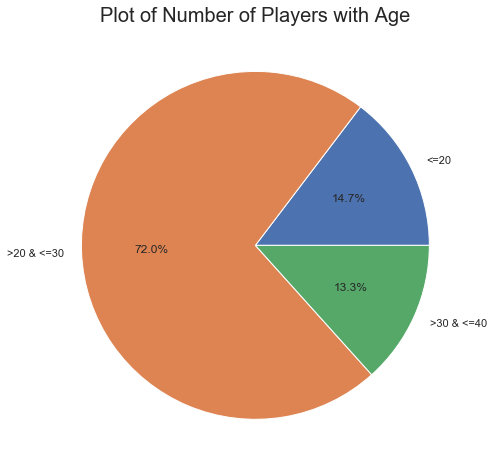

In [21]:
y = np.array([df_age1['Name'].count(),df_age2['Name'].count(),df_age3['Name'].count()])
mylabels = ["<=20", ">20 & <=30", ">30 & <=40"]
plt.title('Plot of Number of Players with Age',fontsize = 20)
plt.pie(y, labels = mylabels, autopct="%.1f%%")
plt.show()

Text(0.5, 1.0, 'Plot of Age range for each Club')

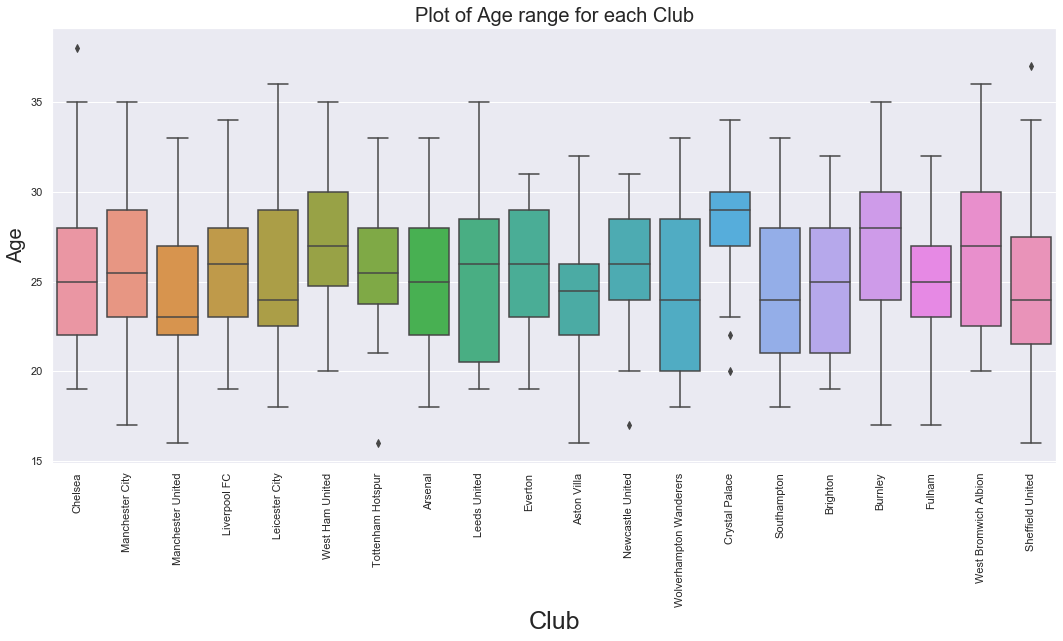

In [22]:
plt.figure(figsize=(18,8))
b = sns.boxplot(x='Club',y='Age',data=data)
b.set_xlabel("Club",fontsize=25)
b.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.title('Plot of Age range for each Club',fontsize = 20)

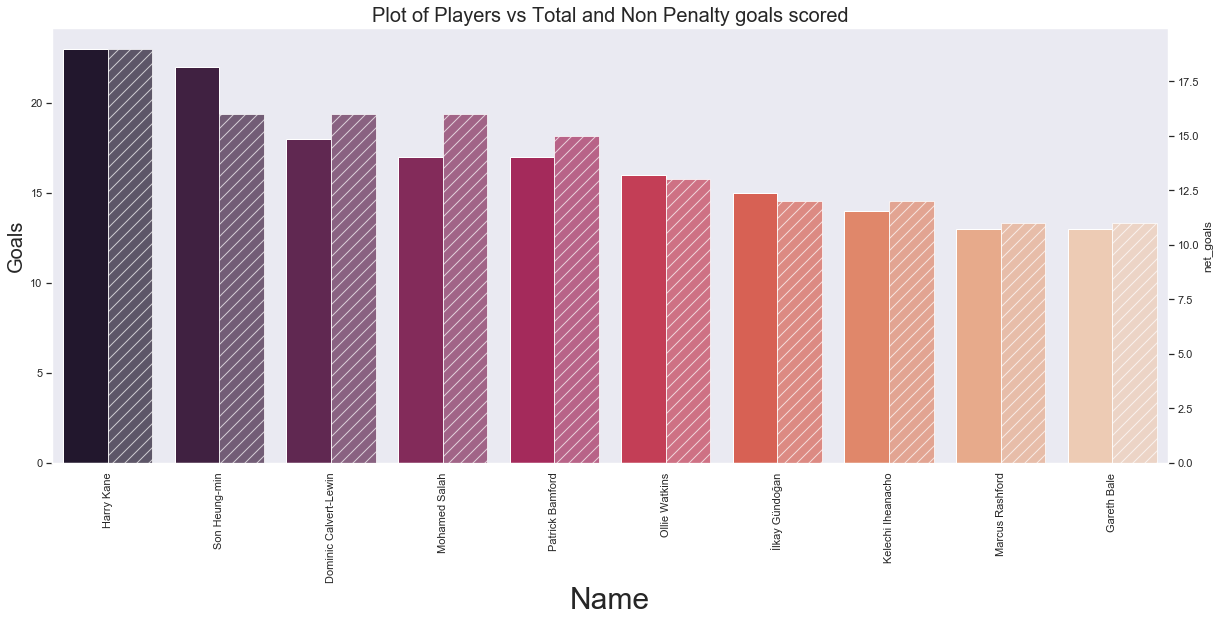

In [23]:
sns.set_theme(style="dark")
ax = sns.barplot(x='Name',y='Goals',data=data.sort_values(by="Goals",ascending= False)[:10],palette='rocket')
plt.xticks(rotation=90)
plt.title('Plot of Players vs Total and Non Penalty goals scored',fontsize = 20)
width = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=30)
ax.set_ylabel("Goals",fontsize=20)
    
ax2 = ax.twinx()
ax2 = sns.barplot(x='Name',y='net_goals',data=data.sort_values(by="net_goals",ascending= False)[:10],palette='rocket',alpha = 0.7,hatch = '//')
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

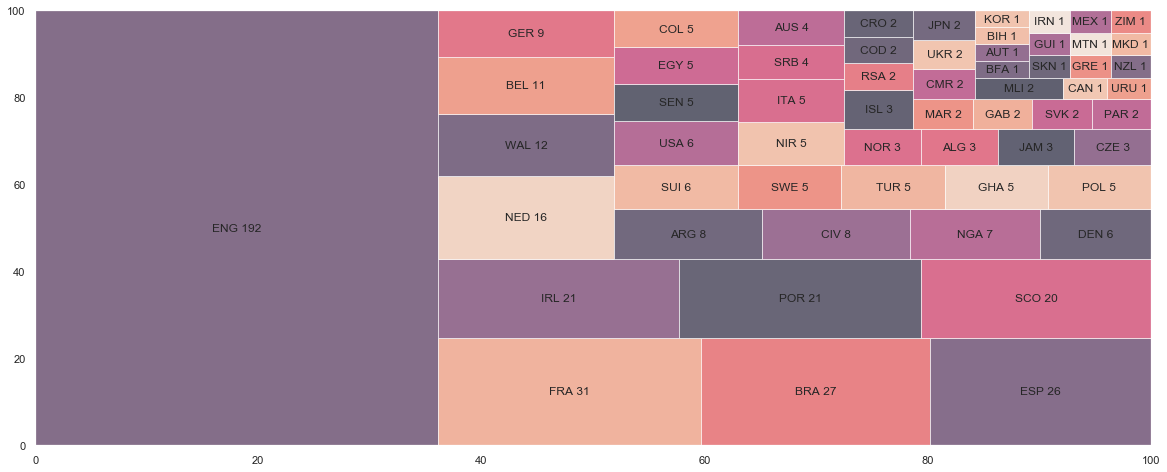

In [24]:
size = data.groupby('Nationality',)['Name'].count().sort_values(ascending= False).tolist() 
label=data.groupby('Nationality',)['Name'].count().sort_values(ascending= False).index.values.tolist()

label = [i+" "+j for i, j in zip(label, [str(x) for x in size])]
squarify.plot(sizes=size, label=label, alpha=.6, text_kwargs={'fontsize':12})

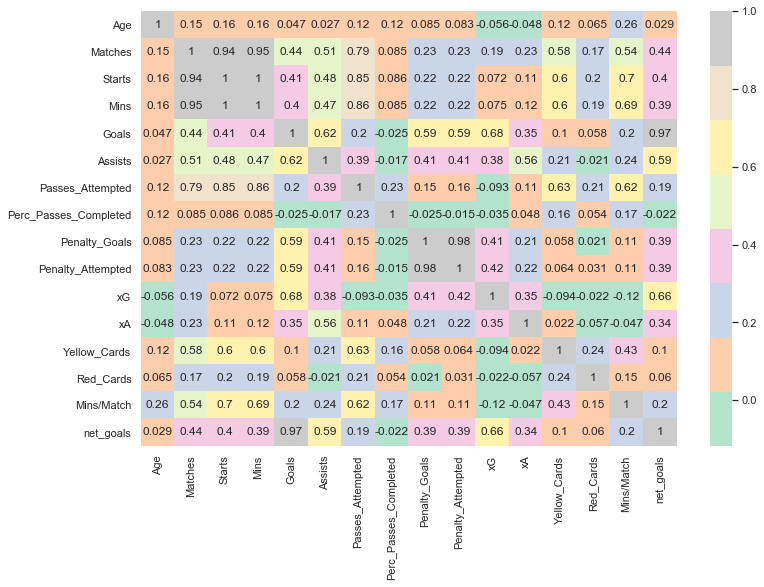

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='Pastel2')

Text(0, 0.5, 'Mins/Match')

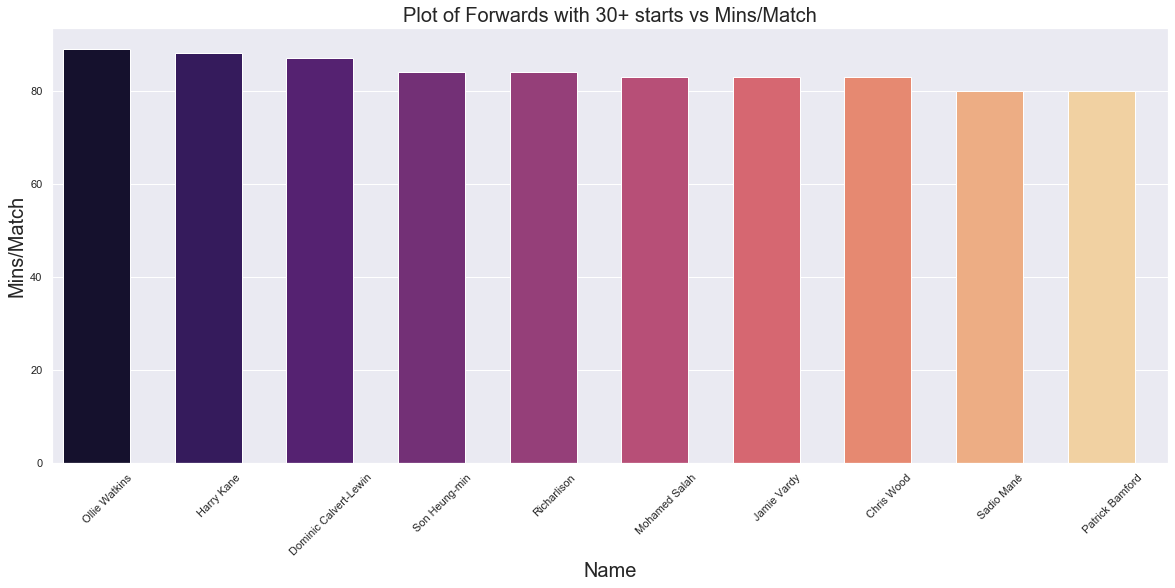

In [26]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x='Name',y='Mins/Match',data=data[(data['Starts'] > 30) & (data['Position'] == 'FW')].sort_values(by ='Mins/Match',ascending= False)[:10],palette='magma')
plt.xticks(rotation=45)
plt.title('Plot of Forwards with 30+ starts vs Mins/Match',fontsize = 20)
width = 0.75
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=20)
ax.set_ylabel("Mins/Match",fontsize=20)


Text(0, 0.5, 'Mins/Match')

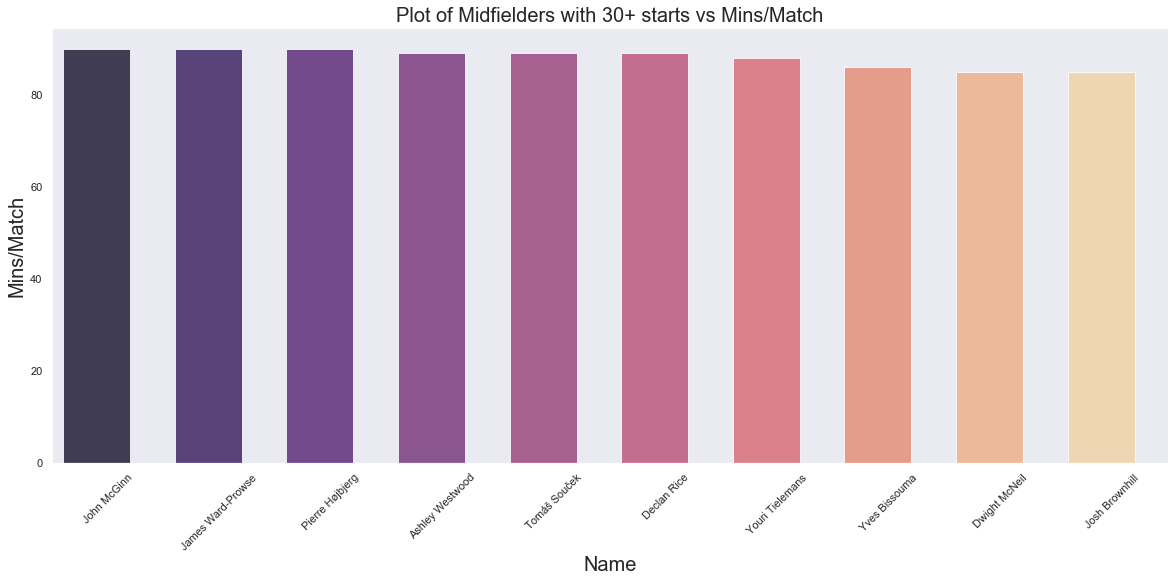

In [27]:
sns.set_theme(style="dark")
ax = sns.barplot(x='Name',y='Mins/Match',data=data[(data['Starts'] > 30) & (data['Position'] == 'MF')].sort_values(by ='Mins/Match',ascending= False)[:10],palette='magma',alpha = 0.8)
plt.xticks(rotation=45)
plt.title('Plot of Midfielders with 30+ starts vs Mins/Match',fontsize = 20)
width = 0.75
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=20)
ax.set_ylabel("Mins/Match",fontsize=20)

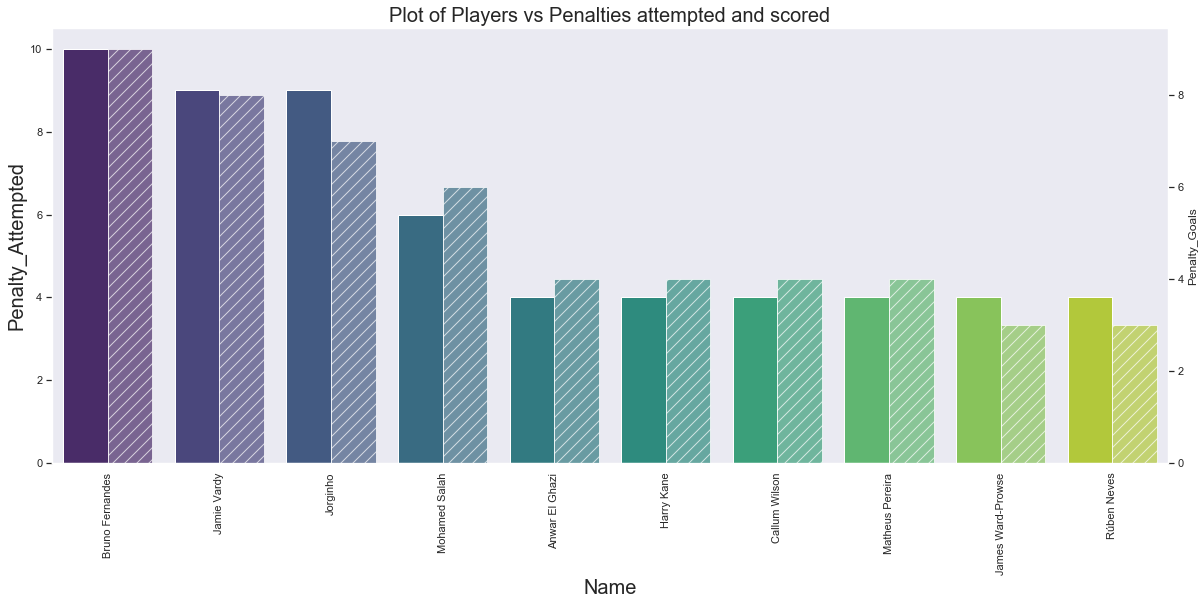

In [28]:
sns.set_theme(style="dark")
ax = sns.barplot(x='Name',y='Penalty_Attempted',data=data.sort_values(by="Penalty_Attempted",ascending= False)[:10],palette='viridis')
plt.xticks(rotation=90)
plt.title('Plot of Players vs Penalties attempted and scored',fontsize = 20)
width = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=20)
ax.set_ylabel("Penalty_Attempted",fontsize=20)
    
ax2 = ax.twinx()
ax2 = sns.barplot(x='Name',y='Penalty_Goals',data=data.sort_values(by="Penalty_Goals",ascending= False)[:10],palette='viridis',alpha = 0.7,hatch = '//')
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

Text(0.5, 1, 'Plot of Goals vs xG ')

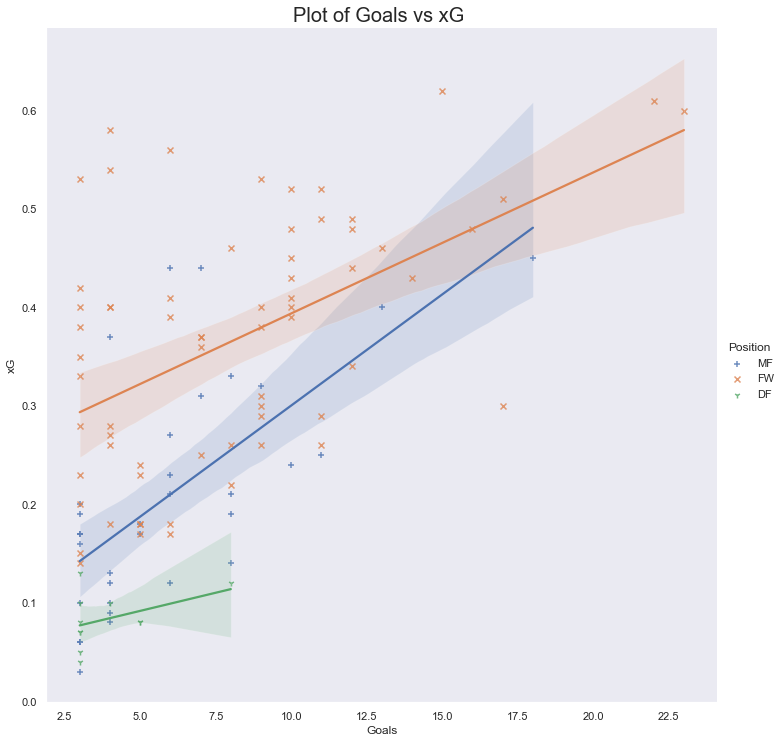

In [29]:
sns.lmplot(x='Goals', y='xG', data = data[(data['Goals'] > 2)],markers=["+", "x", "1"],hue = 'Position',height = 10)
plt.title('Plot of Goals vs xG ',fontsize = 20)

In [30]:
data['Total Cards'] = data['Yellow_Cards'] + data['Red_Cards']

Text(0, 0.5, 'Mins/Match')

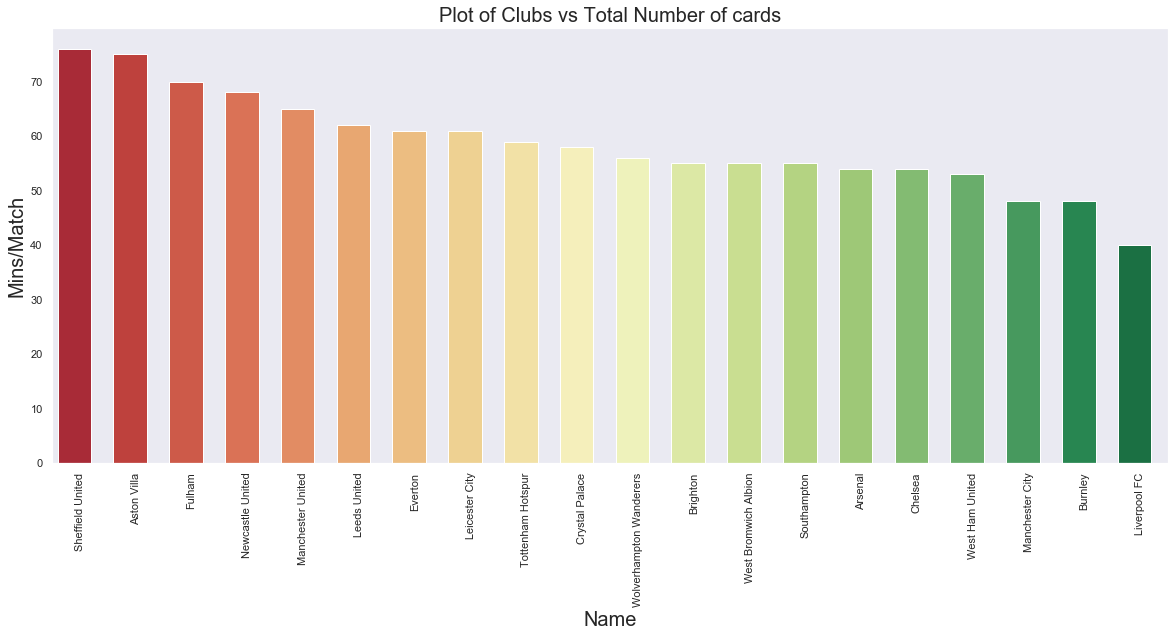

In [31]:
cards = pd.DataFrame(data.groupby('Club', as_index=False)['Total Cards'].sum() )
sns.set_theme(style="dark")
ax = sns.barplot(x='Club',y='Total Cards',data = cards.sort_values(by = 'Total Cards', ascending = False),palette='RdYlGn')
plt.xticks(rotation=90)
plt.title('Plot of Clubs vs Total Number of cards',fontsize = 20)
width = 0.75
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=20)
ax.set_ylabel("Mins/Match",fontsize=20)


Text(0, 0.5, 'Mins/Match')

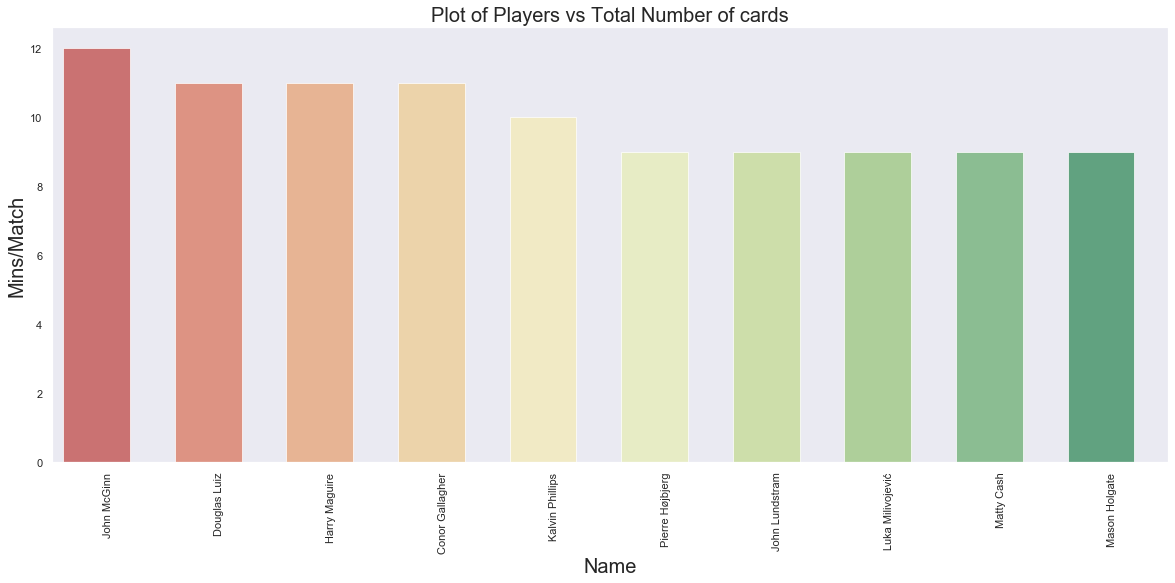

In [32]:
cards = pd.DataFrame(data.groupby('Name', as_index=False)['Total Cards'].sum() )
sns.set_theme(style="dark")
deep = sns.color_palette('deep')
ax = sns.barplot(x='Name',y='Total Cards',data = cards.sort_values(by = 'Total Cards', ascending = False)[:10],palette='RdYlGn',alpha = 0.7)
plt.xticks(rotation=90)
plt.title('Plot of Players vs Total Number of cards',fontsize = 20)
width = 0.75
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)
ax.set_xlabel("Name",fontsize=20)
ax.set_ylabel("Mins/Match",fontsize=20)


In [33]:
#names = np.array([data['Goals'].where(data['Name'] == 'Bruno Fernandes').sum(), data['Assists'].where(data['Name'] == 'Bruno Fernandes').sum(), data['Penalty_Goals'].where(data['Name'] == 'Bruno Fernandes').sum(), data['Yellow_Cards'].where(data['Name'] == 'Bruno Fernandes').sum()])
#label = ["Goals","Assists","Penalty Goals","Yellow Cards"]

#fig = go.Figure(data=[go.Pie(labels=label, values=names, opacity=0.8, hole = 0.7)])
#fig.update_traces(textinfo='value+label', marker=dict(line=dict(color='#000000', width=2)))
#fig.update_layout(title_text='Bruno Fernandes', title_x=0.5, title_font=dict(size=32))
#fig.show()